# $$Explorando~ uma~ Serie ~Temporal:$$

# $$Modelo~ARIMA$$


$$Conceito:$$

- Os modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, no qual uma etapa inicial de diferenciação pode ser aplicada uma ou mais vezes para eliminar a não estacionariedade


- Modelos ARIMA não sazonais são geralmente designados ARIMA(p, d, q), em que os parâmetros p, d e q são números inteiros não negativos, p é a ordem (número de intervalos de tempo) do modelo autoregressivo, d é o grau de diferenciação (o número de vezes que os dados tiveram valores passados subtraídos) e q é a ordem do modelo de média móvel. 


- Modelos ARIMA sazonais são geralmente designados ARIMA **(p, d, q) (P, D, Q) m**, em que **m** refere-se ao número de períodos em cada season e os maiúsculos **P, D, Q** referem-se ao autorregressivo, diferenciado, e termos da média móvel da parte sazonal do modelo ARIMA.


- Quando dois dos três termos são zeros, o modelo pode ser referido com base no parâmetro diferente de zero, eliminando "AR", "I" ou "MA" da sigla que descreve o modelo. Por exemplo, ARIMA (1,0,0) é AR (1), ARIMA (0,1,0) é I (1) e ARIMA (0,0,1) é MA (1).

In [1]:
#Pacotes
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Carregar os dados


In [2]:
#Instalando e importando a API no código
import yfinance as yf 

# escolhendo uma carteira fictícia para exemplificarmos conceitos
codigo = ['PETR4.SA']

# carregando dados do valor 
petr4 = yf.Ticker(codigo[0])

petr4 = petr4.history(start='2020-01-01', end='2022-04-26') 
petr4 = petr4.iloc[:,0:5]
petr4

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,22.686013,22.827290,22.537300,22.827290,37774500
2020-01-03,22.961131,23.228813,22.641401,22.641401,71595600
2020-01-06,22.626528,23.005744,22.269620,22.909081,81844000
2020-01-07,22.916515,22.961128,22.656269,22.819853,32822000
2020-01-08,22.819852,22.879337,22.485250,22.678576,48215600
...,...,...,...,...,...
2022-04-18,31.160000,31.389999,30.469999,30.719999,76350600
2022-04-19,31.160000,32.000000,31.120001,31.650000,88494100
2022-04-20,31.650000,31.950001,31.330000,31.799999,34694700


**Dados do valor da ação da petrobras**

In [3]:
# Serie Temporal com os dados de maior alta do dia
petr4 = pd.DataFrame(petr4['High'])
petr4

,High
Date,
2020-01-02,22.827290
2020-01-03,23.228813
2020-01-06,23.005744
2020-01-07,22.961128
2020-01-08,22.879337
...,...
2022-04-18,31.389999
2022-04-19,32.000000
2022-04-20,31.950001


**Vamos trabalhar com a variável High, que indica o valor maximo de cada dia de operação**

In [4]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
dtypes: float64(1)
memory usage: 8.9 KB


**Os dados já estão no formato de série temporal**

In [5]:
# Shape
petr4.shape

(572, 1)

**São 572 observações**

In [6]:
# Transformar o indice em coluna, para extrair as datas
petr4 = petr4.reset_index()
petr4

,Date,High
0,2020-01-02,22.827290
1,2020-01-03,23.228813
2,2020-01-06,23.005744
3,2020-01-07,22.961128
4,2020-01-08,22.879337
...,...,...
567,2022-04-18,31.389999
568,2022-04-19,32.000000
569,2022-04-20,31.950001
570,2022-04-22,31.299999


In [7]:
# Vamos extrair os detalhes da coluna Date: ano, mês, dia 
petr4['ano'] = petr4.Date.dt.year
petr4['mes'] = petr4.Date.dt.month
petr4['dia'] = petr4.Date.dt.day
petr4 = petr4.set_index('Date')
petr4

,High,ano,mes,dia
Date,,,,
2020-01-02,22.827290,2020,1,2
2020-01-03,23.228813,2020,1,3
2020-01-06,23.005744,2020,1,6
2020-01-07,22.961128,2020,1,7
2020-01-08,22.879337,2020,1,8
...,...,...,...,...
2022-04-18,31.389999,2022,4,18
2022-04-19,32.000000,2022,4,19
2022-04-20,31.950001,2022,4,20


In [8]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
 1   ano     572 non-null    int64  
 2   mes     572 non-null    int64  
 3   dia     572 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.3 KB


In [9]:
# A variável High é nossa variável target 
target = petr4['High']

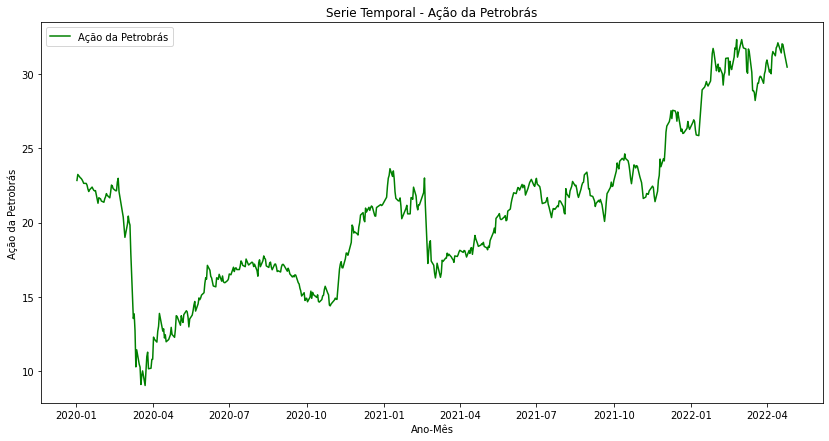

In [10]:
# Plot da Série Temporal
plt.figure(figsize=(14, 7))
plt.title("Serie Temporal - Ação da Petrobrás")
plt.plot(target, label = "Ação da Petrobrás", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Ação da Petrobrás")
plt.legend(loc = "best");

**Série aparenta ter sazonalidade e tendência**

<AxesSubplot:xlabel='ano'>

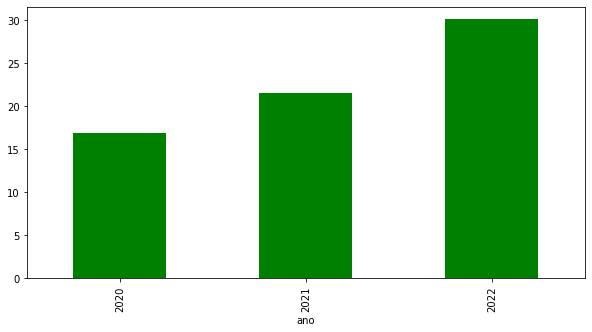

In [11]:
# Vamos criar um gráfico de barras com grafico por ano. 
plt.figure(figsize=(10, 5))
petr4.groupby('ano')['High'].mean().plot.bar(color = 'green')

**Tendência clara de alta**

<AxesSubplot:xlabel='mes'>

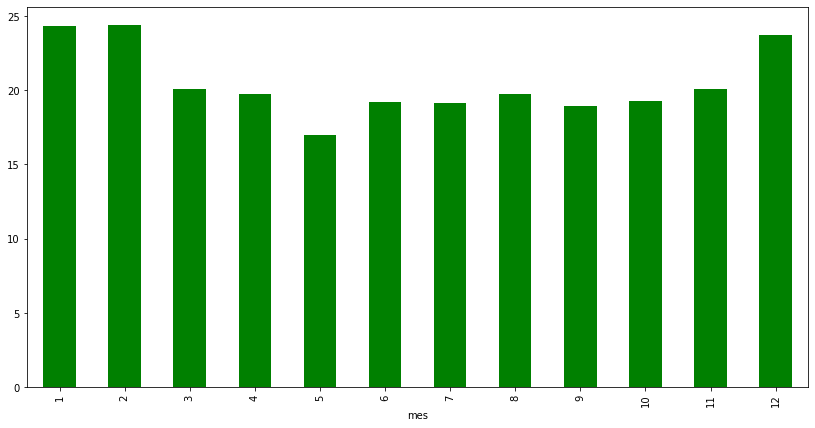

In [12]:
# Vamos criar um gráfico de barras por mês. 
plt.figure(figsize=(14, 7))
petr4.groupby('mes')['High'].mean().plot.bar(color = 'green')

**Os meses de dezembro a fevereiro são os que tem o maior índice de alta**

<AxesSubplot:xlabel='dia'>

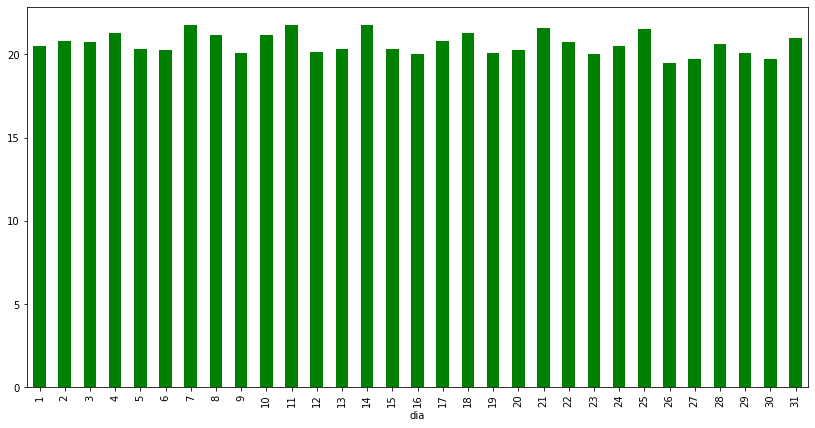

In [13]:
# A média diária por dia do mês
plt.figure(figsize=(14, 7))
petr4.groupby('dia')['High'].mean().plot.bar(color = 'green')

**Os dias do mês não parece ser relevante**

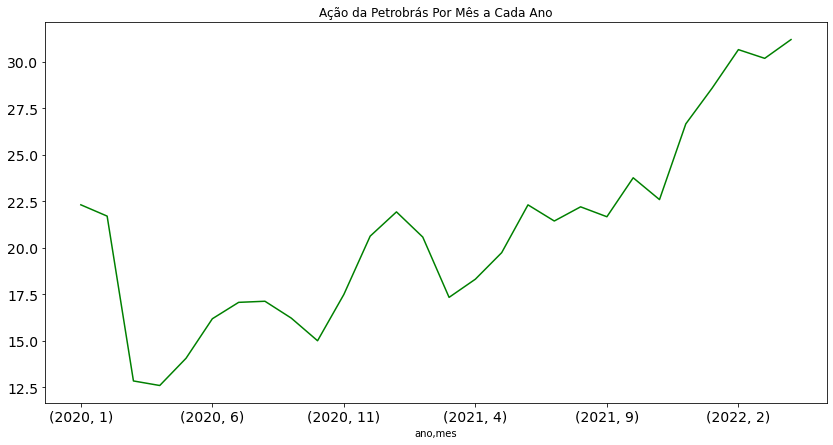

In [14]:
# Calcular a média mensal por ano
plt.figure(figsize=(14, 7))
media_mensal = petr4.groupby(['ano','mes'])['High'].mean()
media_mensal.plot(title = "Ação da Petrobrás Por Mês a Cada Ano", fontsize = 14, color = 'green');

**Tendência de alta com o passar dos meses**

### Modelo Aditivo (sazonalidade constante) X Modelo Multiplicativo (sazonalidade crescente)

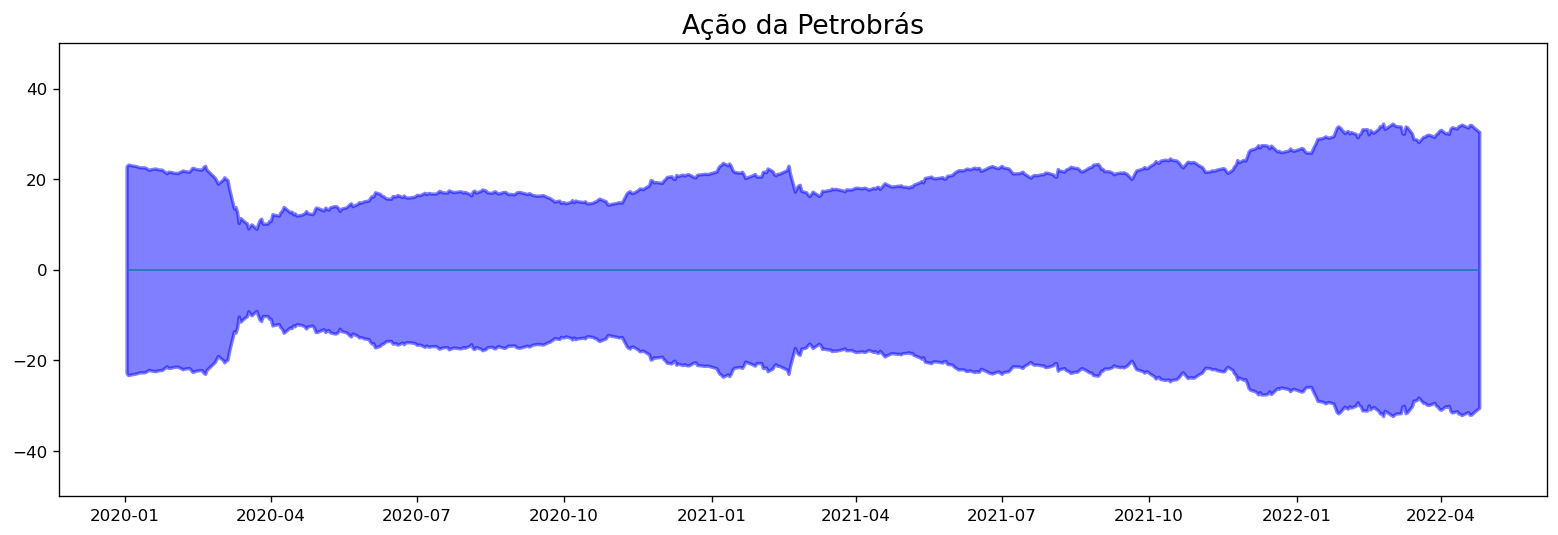

In [15]:
#Grafico de linha para verificar a variação nos dados em relação ao tempo

# Prepara os dados
x = petr4.index.values
y1 = petr4['High'].values


# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16,5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')


# Limites do eixo y
plt.ylim(-50, 50)


# Título
plt.title('Ação da Petrobrás', fontsize = 16)


# Limite das linhas
plt.hlines(y = 0, xmin = np.min(petr4.index), xmax = np.max(petr4.index), linewidth = 1);


# Mostra o gráfico
plt.show()

**A Série Temporal não tem uma clareza nos dados para saber se a sazonalidade é aditiva ou multiplicativa, o correto é testar as 2 formas**

## Verificar a estacionaridade da série

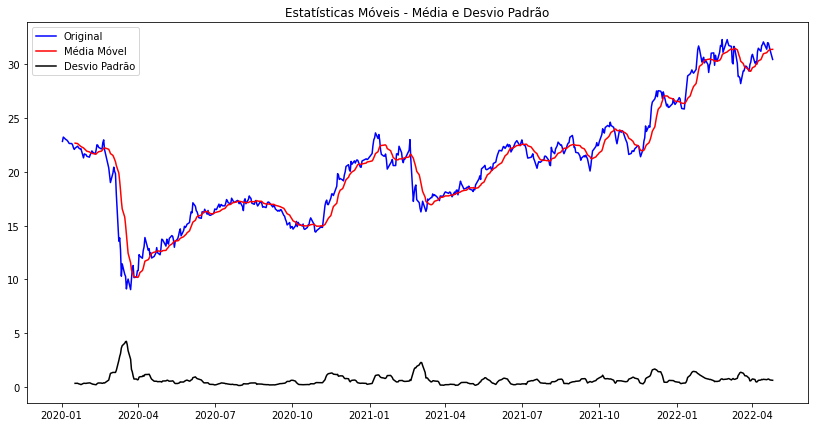


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.225023
Valor-p                           0.662740
Número de Lags Consideradas       7.000000
Número de Observações Usadas    564.000000
Valor Crítico (1%)               -3.441998
Valor Crítico (5%)               -2.866678
Valor Crítico (10%)              -2.569506
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [16]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    plt.figure(figsize=(14, 7))
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')
        

testa_estacionaridade(petr4.High)

## Pré-Processamento

-  Dividir os dados em treino e teste

In [17]:
df_treino = petr4.iloc[0:500]
df_teste = petr4.iloc[500:]

- Dividir os dados de treino em validação também para treinar e validar a performance do modelo

In [18]:
# Observe que os registros são separados em ordem cronológica.
df_treino = petr4.iloc[0:420]
df_valid = petr4.iloc[420:500]
df_treino

,High,ano,mes,dia
Date,,,,
2020-01-02,22.827290,2020,1,2
2020-01-03,23.228813,2020,1,3
2020-01-06,23.005744,2020,1,6
2020-01-07,22.961128,2020,1,7
2020-01-08,22.879337,2020,1,8
...,...,...,...,...
2021-09-03,21.810228,2021,9,3
2021-09-06,21.753216,2021,9,6
2021-09-08,21.460026,2021,9,8


# Modelagem:

- Para Modelos ARIMA, devemos remover a tendência, por isso sempre aplicamos diferenciação para as séries não estacionarias**

## 1° - Transformação de Log


- Séries temporais com uma distribuição exponencial podem ser linearizadas usando o logaritmo dos valores


- É importante observar que esta operação assume que os valores são positivos e diferentes de zero

In [19]:
# Aplicando transformação de log
df_treino_log = np.log(df_treino.High) 
df_treino_log

Date
2020-01-02    3.127957
2020-01-03    3.145393
2020-01-06    3.135744
2020-01-07    3.133803
2020-01-08    3.130234
                ...   
2021-09-03    3.082379
2021-09-06    3.079762
2021-09-08    3.066192
2021-09-09    3.048194
2021-09-10    3.058190
Name: High, Length: 420, dtype: float64

**Aplicando transformação de log para deixar os dados perto de uma distribuição normal e mais linear**

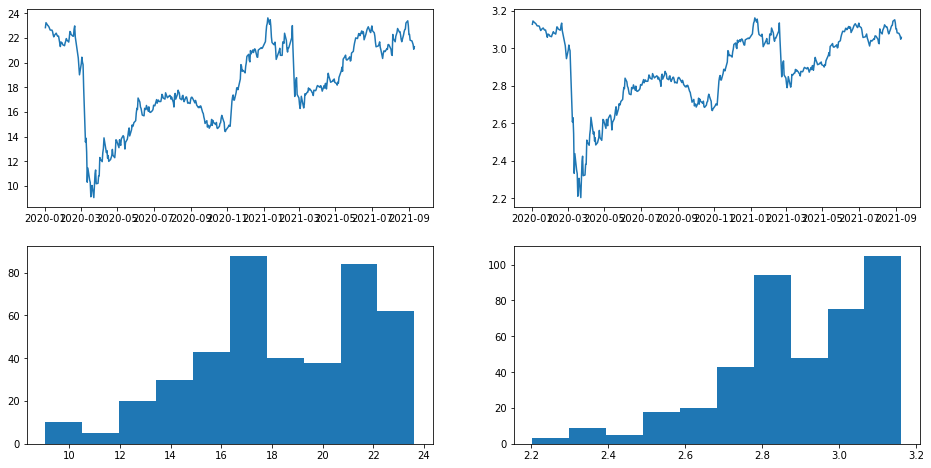

In [20]:
# Plot
fig, axes = plt.subplots(2, 2,figsize=(16,8))
axes[0,0].plot(df_treino.High) 
axes[0,1].plot(df_treino_log) 
axes[1,0].hist(df_treino.High) 
axes[1,1].hist(df_treino_log) 
plt.show()

In [21]:
### Normalidade da Série

#P_value > 0.05 = dados normalizados

from scipy import stats
shapiro_test_orig = stats.shapiro(df_treino)[1]
shapiro_test_log = stats.shapiro(df_treino_log)[1]

print(f'Teste Shapiro dados Originais:  {round(shapiro_test_orig,5)}')
print(f'Teste Shapiro dados com log: {round(shapiro_test_log,5)}')

Teste Shapiro dados Originais:  0.0
Teste Shapiro dados com log: 0.0


**Observamos que após aplicar o log na série, o valor dos dados ficam em uma escala menor, porém a distribuição continua não sendo normal**

# Diferenciação(Lag)


- O processo de diferenciação pode ser repetido mais de uma vez até que toda a dependência temporal seja removida.


- Remove a tendência e a sazonalidade da série, para ser estacionária


- 1° diferenciação normalmente elimina a tendência da série e a 2° diferenciação elimina a sazonalidade

In [22]:
# Uma Diferenciação
df_treino_log_diff = df_treino_log - df_treino_log.shift(1)
df_treino_log_diff.dropna(inplace = True)
df_treino_log_diff

Date
2020-01-03    0.017437
2020-01-06   -0.009650
2020-01-07   -0.001941
2020-01-08   -0.003569
2020-01-09   -0.004887
                ...   
2021-09-03   -0.021061
2021-09-06   -0.002617
2021-09-08   -0.013570
2021-09-09   -0.017998
2021-09-10    0.009996
Name: High, Length: 419, dtype: float64

**Aplicamos diferenciação nos dados com log para comparar com o modelo ARIMA, no qual será aplicado os mesmos efeitos**

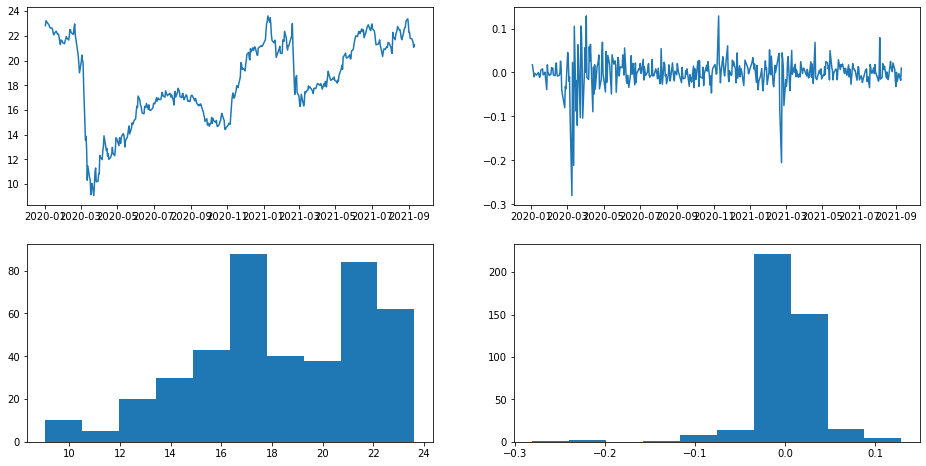

In [23]:
# Plot
fig, axes = plt.subplots(2, 2,figsize=(16,8))
axes[0,0].plot(df_treino.High) 
axes[0,1].plot(df_treino_log_diff)
axes[1,0].hist(df_treino.High) 
axes[1,1].hist(df_treino_log_diff) 
plt.show()

In [24]:
### Normalidade da Série

#P_value > 0.05 = dados normalizados

from scipy import stats
shapiro_test_orig = stats.shapiro(df_treino)[1]
shapiro_test_log = stats.shapiro(df_treino_log_diff)[1]

print(f'Teste Shapiro dados Originais:  {round(shapiro_test_orig,5)}')
print(f'Teste Shapiro dados com log e Diff: {round(shapiro_test_log,5)}')

Teste Shapiro dados Originais:  0.0
Teste Shapiro dados com log e Diff: 0.0


**Aplicar a diferenciação após a transformação logaritmica deixou os dados com distribuição normal**

- ### Aplicar a função para checar a estacionaridade

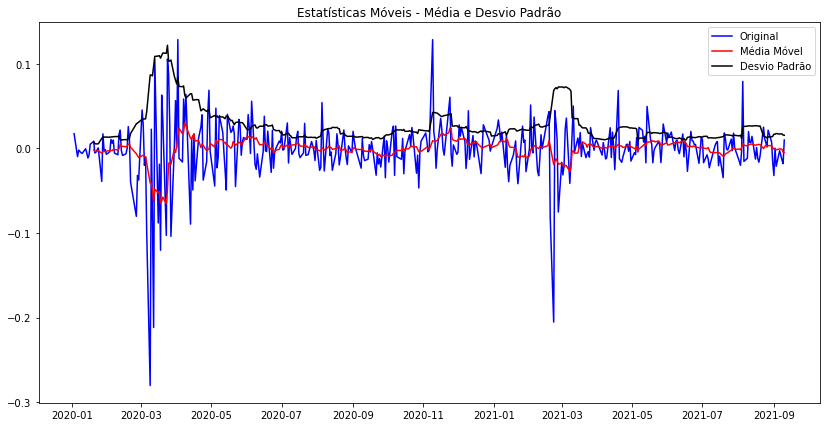


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -5.598950
Valor-p                           0.000001
Número de Lags Consideradas       6.000000
Número de Observações Usadas    412.000000
Valor Crítico (1%)               -3.446322
Valor Crítico (5%)               -2.868581
Valor Crítico (10%)              -2.570521
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [25]:
#função para checar a estacionaridade
df_treino_log_diff = df_treino_log_diff.dropna() #Excluir os dados NAN gerado pelo diff
testa_estacionaridade(df_treino_log_diff)

**Série Temporal agora está estacionaria**

**OBS: Realizamos todas essas etapas de diferenciação e outras transformações para descobrir os coeficientes do modelo ARIMA (p, d e q)**

# Forecasting - Modelagem Preditiva Para Séries Temporais

 ## Modelo ARIMA:

**Um modelo ARIMA requer 3 parâmetros:**

- param q: (int) Ordem do modelo MA.
- param p: (int) Ordem do modelo de AR.
- param d: (int) Número de vezes que os dados precisam ser diferenciados.

 ## 1° Determinando o Valor do Parâmetro d (I) para o Modelo ARIMA

- O objetivo da diferenciação é tornar a série temporal estacionária. 


- A ordem correta de diferenciação é a diferenciação mínima necessária para obter uma série quase estacionária que circula em torno de uma média definida e o gráfico ACF chega a zero rapidamente.


- Se as autocorrelações forem positivas para muitos atrasos (10 ou mais), a série precisará ser diferenciada. Por outro lado, se a autocorrelação lag 1 em si for muito negativa, a série provavelmente será super diferenciada.



- Se não for possível realmente decidir entre duas ordens de diferenciação, então escolha a ordem que apresenta o menor desvio padrão na série diferenciada.

- ### Antes, verificar se a série é estacionária usando o teste Augmented Dickey Fuller

In [26]:
# Teste ADF
resultado = adfuller(df_treino['High'])
print('Estatística ADF: %f' % resultado[0])
print('Valor-p: %f' % resultado[1])

Estatística ADF: -2.478857
Valor-p: 0.120704


**Série não é estacionaria, fazer a diferenciação da série para torna-la estacionaria**

- ### Diferenciação:

- Saber com quantas diferenciações a série se torna estacionaria

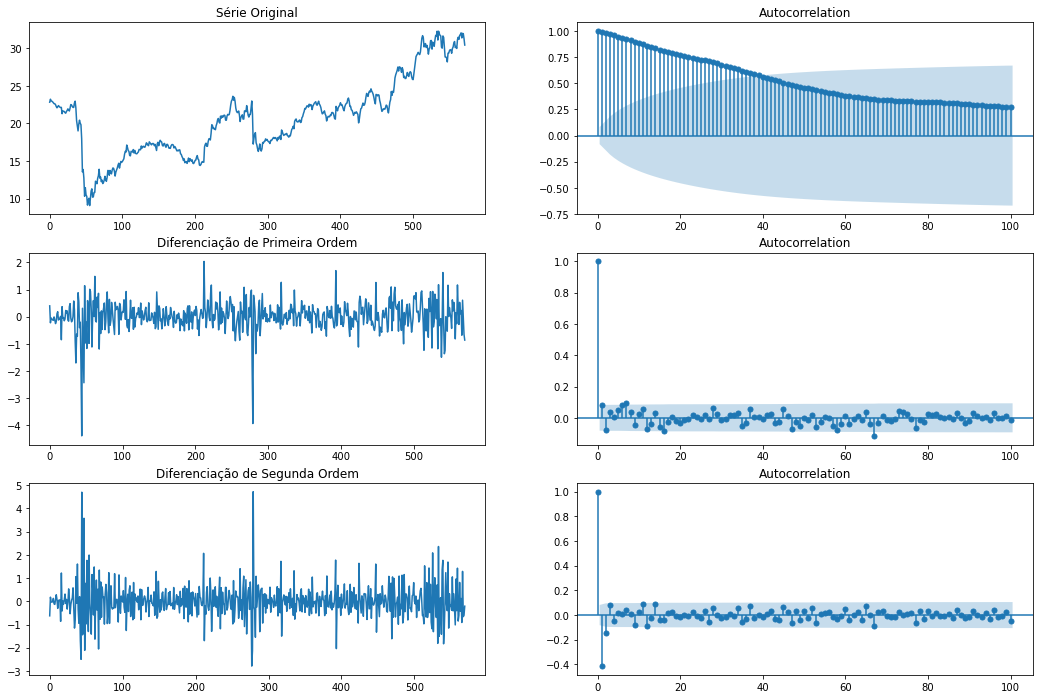

In [27]:
#Plot X autocorrelação
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Área de Plotagem
fig, axes = plt.subplots(3, 2,figsize=(18,12))

# Série Original
axes[0, 0].plot(target.values); axes[0, 0].set_title('Série Original')
plot_acf(target.values, lags = 100, ax = axes[0, 1])

# Diferenciação de Primeira Ordem
axes[1, 0].plot(np.diff(target.values)); axes[1, 0].set_title('Diferenciação de Primeira Ordem')
plot_acf(np.diff(target.values), lags = 100, ax = axes[1, 1])

# Diferenciação de Segunda Ordem
axes[2, 0].plot(np.diff(np.diff(target.values))); axes[2, 0].set_title('Diferenciação de Segunda Ordem')
plot_acf(np.diff(np.diff(target.values)), lags = 100, ax = axes[2, 1])

plt.show()

**Veja que a série original tem um decaimento lento dos lags na autocorrelação, indicando uma alta correlação com os primeiros lags, com a diferenciação de 1° ordem já não temos mais essa autocorrelação, diferente da diferenciação de 2° ordem que tem autocorrelação com os 2 primeiros lags. Ou seja, o valor d = 1 parece ser uma boa opção para o Modelo ARIMA.**

In [28]:
# Teste KPSS, indica quantos diferenciação é necessaria para tornar os dados estacionarios
from pmdarima.arima.utils import ndiffs

ndiffs(target, test = 'kpss')  

1

**O teste KPSS é uma ajuda para indicar o numero correto de diferenciações para tornar a série estacionaria**

- **Conclusão parâmetro I: Verificando a série original comparada com a série diferenciada concluimos que o parametro I precisa ser diferenciado 1 vez para deixar a série estacionaria. Agora vamos encontrar o termo AR, com o parâmetro p**

 ## 2° Determinando o Valor do Parâmetro AR(p) para o Modelo ARIMA

- Usar o graficos PAC para descobrir o número necessário de termos AR


- A autocorrelação parcial pode ser imaginada como a correlação entre a série e seu atraso, após excluir as contribuições dos atrasos intermediários. Portanto, o PACF meio que transmite a correlação pura entre um atraso e a série. Dessa forma, você saberá se esse atraso é necessário no termo AR ou não


- Qualquer autocorrelação em uma série estacionarizada pode ser retificada adicionando termos AR suficientes. Portanto, inicialmente consideramos a ordem do termo AR igual a tantas defasagens que ultrapassam o limite de significância no gráfico PACF.

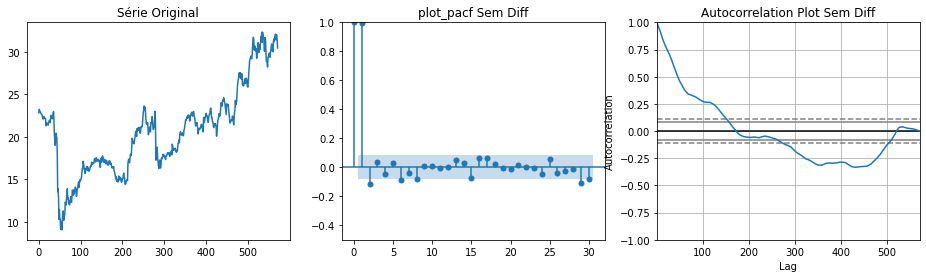

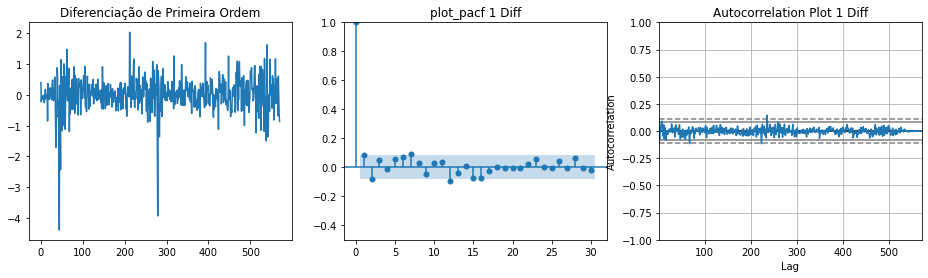

In [29]:
# Gráfico Diff, PACF e autocorrelation_plot

from pandas.plotting import autocorrelation_plot
fig, axes = plt.subplots(1, 3,figsize=(16,4))
axes[0].plot(target.values); axes[0].set_title('Série Original')
axes[1].set(ylim = (-0.5,1))
plot_pacf(target.values, lags = 30, ax = axes[1]);axes[1].set_title('plot_pacf Sem Diff')
axes[2].set()
autocorrelation_plot(target.values);axes[2].set_title('Autocorrelation Plot Sem Diff')


fig, axes = plt.subplots(1, 3,figsize=(16,4))
axes[0].plot(np.diff(target.values)); axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (-0.5,1))
plot_pacf(np.diff(target.values), lags = 30, ax = axes[1]);axes[1].set_title('plot_pacf 1 Diff')
axes[2].set()
autocorrelation_plot(np.diff(target.values));axes[2].set_title('Autocorrelation Plot 1 Diff')
plt.show()

**No grafico original percebemos uma autocorrelação nos dados, a interpretação fica mais evidente no grafico da Autocorrelation Plot Sem Diff, portanto, temos que usar o termo AR para tornar a série estacionaria**

**OBS: Para saber o valor do AR, observe o 2° grafico e conte quantos pontos passam do valor critico antes de retornar para dentro da faixa, neste caso seria 2, portanto, para tornar a série estacionaria o P = 2**

**Diferenciação de Primeira Ordem** = Como já vimos a dif de ordem 1 gira em torno da média 0, portanto ela é uma série estacionaria, precisamos verificar o valor de (P) caso o valor de (I) seja = 1

**plot_pacf 1 Diff** = Nenhum dos lags tem autocorrelação com o seu anterior, portanto P = 0 quando o parâmetro (I) = 1

**Autocorrelation Plot 1 Difft** = Interpretação parecida com a do plot_pacfs, nenhum dos lags tem autocorrelação

- **Conclusão parâmetro P: Verificando a série original comparada com a série diferenciada, concluimos que o parametro p precisa ser diferenciado 1 vez para deixar a série estacionaria. caso a série já esteja diferenciada com o parâmetro I sendo = 1, o parâmetro p fica sendo = 0**

## 3° Determinando o Valor do Parâmetro q para o Modelo ARIMA

-  Observar o gráfico ACF para o número de termos MA. Um termo MA é tecnicamente o erro da previsão atrasada


- O ACF informa quantos termos MA são necessários para remover qualquer autocorrelação na série estacionarizada


- Os modelos MA (q) tentam capturar os efeitos de choque observados em termos de ruído branco. Estes efeitos de choque podem ser considerados eventos inesperados que afetam o processo de observação, p, como ganhos repentinos, guerras, ataques, etc.


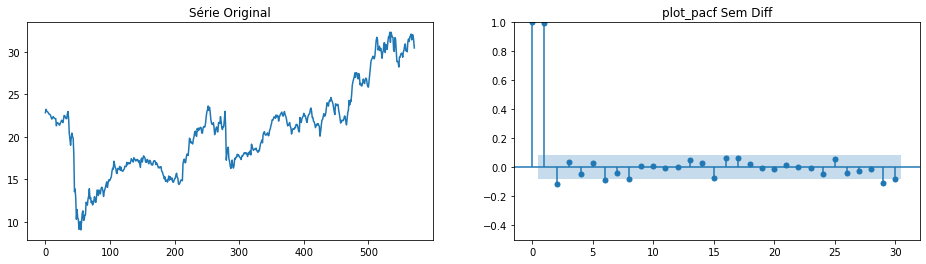

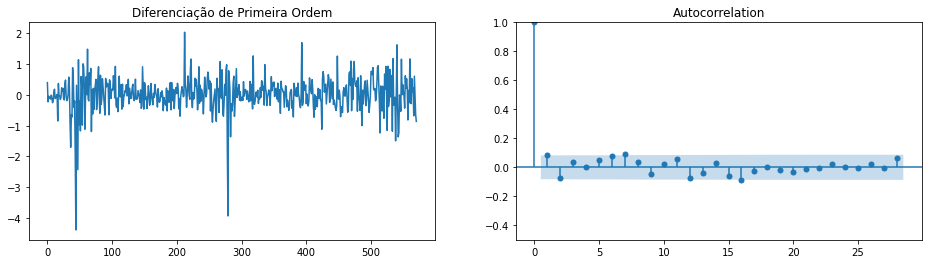

In [30]:
# Gráfico ACF

fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(target.values); axes[0].set_title('Série Original')
axes[1].set(ylim = (-0.5,1))
plot_pacf(target.values, lags = 30, ax = axes[1]);axes[1].set_title('plot_pacf Sem Diff')


fig, axes = plt.subplots(1, 2,figsize=(16,4))
axes[0].plot(np.diff(target.values)); axes[0].set_title('Diferenciação de Primeira Ordem')
axes[1].set(ylim = (-0.5,1))
plot_acf(np.diff(target.values), ax = axes[1])
plt.show()

In [31]:
# Aplicando transformação de log
df_treino_log = np.log(df_treino['High']) 


**Aplicando transformação de log para deixar os dados perto de uma distribuição normal e mais linear**

In [32]:
# Aplicar diferenciação na série
df_treino_log_diff = df_treino_log - df_treino_log.shift(1) 

**Aplicamos diferenciação nos dados com log para comparar com o modelo ARIMA, no qual será aplicado os mesmos efeitos**

In [317]:
# Cria o Modelo ARIMA
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')


# Reamostrando os dados para frequência mensal
# Usando o valor médio das vendas diárias - definimos o mês como índice
media_vendas_tecnologia = df_treino_log.resample('MS').mean()

# Definimos:

# p = 1
# d = 1
# q = 0

# Modelo 
# Usamos a serie sem diferenciação pois determinamos os parametros dentro do algoritimo do ARIMA
modelo_AR = ARIMA(media_vendas_tecnologia, order = (1, 1, 2))

In [316]:
df_treino_log

Date
2020-01-02    3.127957
2020-01-03    3.145393
2020-01-06    3.135744
2020-01-07    3.133803
2020-01-08    3.130234
                ...   
2021-09-03    3.082379
2021-09-06    3.079762
2021-09-08    3.066192
2021-09-09    3.048194
2021-09-10    3.058190
Name: High, Length: 420, dtype: float64

In [297]:
# Treinamento
modelo_v1 = modelo_AR.fit( disp = False)  


In [298]:
# Sumário do Modelo - Nas próximas aulas vamos interpretar esse sumário do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                  419
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 818.226
Method:                       css-mle   S.D. of innovations              0.034
Date:                Fri, 29 Apr 2022   AIC                          -1626.452
Time:                        17:11:23   BIC                          -1606.263
Sample:                             1   HQIC                         -1618.472
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.002     -0.102      0.919      -0.003       0.003
ar.L1.D.High    -0.7142      0.154     -4.625      0.000      -1.017      -0.412
ma.L1.D.High     0.7437      0.158      4.717      0.000       0.435       1.053
ma.L2.D.High    -0.0544      0.053     -1.027      0.304      -0.158       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4003           +0.0000j            1.4003            0.5000
MA.1           -1.2332           +0.0000j            1.2332            0.5000
MA.2           14.8967           +0.0000j           14.8967            0.0000
-----------------------------------------------------------------------------
"""

**Modelo AR**

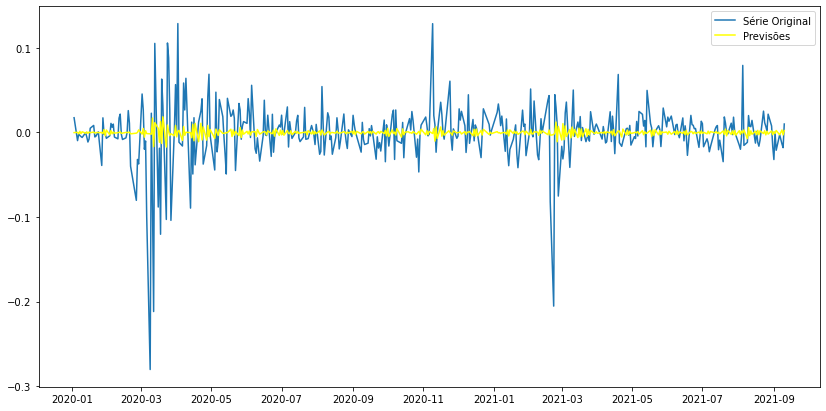

In [300]:
#Dados reais x previsão
dados_reais = df_treino_log_diff
previsoes = modelo_v1.fittedvalues

# Plot
plt.figure(figsize=(14, 7))
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes, color = 'yellow', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

**O modelo se ajustou bem aos dados de Treino**

## Forecast

In [302]:
# Aplicadar as transformações  nos dados  de validação/teste
df_valid_log = np.log(df_valid['High'])
df_valid_log

Date
2021-09-13    3.067709
2021-09-14    3.062390
2021-09-15    3.070358
2021-09-16    3.062009
2021-09-17    3.053589
                ...   
2022-01-03    3.285902
2022-01-04    3.292043
2022-01-05    3.287611
2022-01-06    3.266202
2022-01-07    3.253557
Name: High, Length: 80, dtype: float64

**Temos que fazer o mesmo pré-processamento feito antes com os dados de treino agora com os dados de validação**

In [303]:
# Forecast
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
fc, se, conf = modelo_v1.forecast(len(df_valid_log), alpha = 0.05) 

In [304]:
# Dados das Previsões
fc

array([3.05736757, 3.05724439, 3.05704471, 3.05689966, 3.0567156 ,
       3.0565594 , 3.0563833 , 3.05622141, 3.05604938, 3.05588459,
       3.05571462, 3.05554836, 3.05537945, 3.05521243, 3.05504406,
       3.05487665, 3.05470855, 3.05454095, 3.054373  , 3.05420529,
       3.05403741, 3.05386966, 3.05370181, 3.05353403, 3.0533662 ,
       3.05319841, 3.05303059, 3.05286279, 3.05269498, 3.05252717,
       3.05235936, 3.05219155, 3.05202375, 3.05185594, 3.05168813,
       3.05152032, 3.05135251, 3.05118471, 3.0510169 , 3.05084909,
       3.05068128, 3.05051347, 3.05034567, 3.05017786, 3.05001005,
       3.04984224, 3.04967443, 3.04950663, 3.04933882, 3.04917101,
       3.0490032 , 3.04883539, 3.04866759, 3.04849978, 3.04833197,
       3.04816416, 3.04799635, 3.04782855, 3.04766074, 3.04749293,
       3.04732512, 3.04715731, 3.04698951, 3.0468217 , 3.04665389,
       3.04648608, 3.04631827, 3.04615047, 3.04598266, 3.04581485,
       3.04564704, 3.04547923, 3.04531143, 3.04514362, 3.04497

In [305]:
# Erros do modelo
se

array([0.03432777, 0.04927031, 0.05916162, 0.06853759, 0.07618989,
       0.0835235 , 0.09000956, 0.09622803, 0.10195411, 0.10745263,
       0.11263042, 0.11761648, 0.12237484, 0.12697201, 0.1313967 ,
       0.1356853 , 0.13983681, 0.14387247, 0.14779527, 0.1516185 ,
       0.15534634, 0.15898772, 0.1625469 , 0.16603026, 0.1694417 ,
       0.17278602, 0.17606667, 0.17928742, 0.18245124, 0.18556118,
       0.18861981, 0.19162965, 0.19459293, 0.19751177, 0.20038809,
       0.2032237 , 0.20602029, 0.20877943, 0.21150257, 0.21419109,
       0.21684629, 0.21946936, 0.22206145, 0.22462363, 0.22715691,
       0.22966225, 0.23214056, 0.23459268, 0.23701944, 0.2394216 ,
       0.2417999 , 0.24415503, 0.24648766, 0.24879842, 0.25108791,
       0.25335672, 0.25560539, 0.25783445, 0.2600444 , 0.26223573,
       0.2644089 , 0.26656435, 0.26870252, 0.2708238 , 0.2729286 ,
       0.27501728, 0.27709023, 0.27914778, 0.28119027, 0.28321804,
       0.28523139, 0.28723063, 0.28921604, 0.29118793, 0.29314

In [306]:
# Coeficientes(intervalo de confiança de cada ponto de dado)
conf[0:10]

array([[2.99008638, 3.12464875],
       [2.96067635, 3.15381242],
       [2.94109007, 3.17299934],
       [2.92256845, 3.19123087],
       [2.90738616, 3.20604503],
       [2.89285634, 3.22026245],
       [2.8799678 , 3.2327988 ],
       [2.86761795, 3.24482488],
       [2.85622299, 3.25587576],
       [2.84528131, 3.26648786]])

In [307]:
# Criar um dataframe para criar os intervalos de confiança
fc_series = pd.Series(fc, index = df_valid_log.index)
limite_inferior = pd.Series(conf[:, 0], index = df_valid.index)
limite_superior = pd.Series(conf[:, 1], index = df_valid.index)

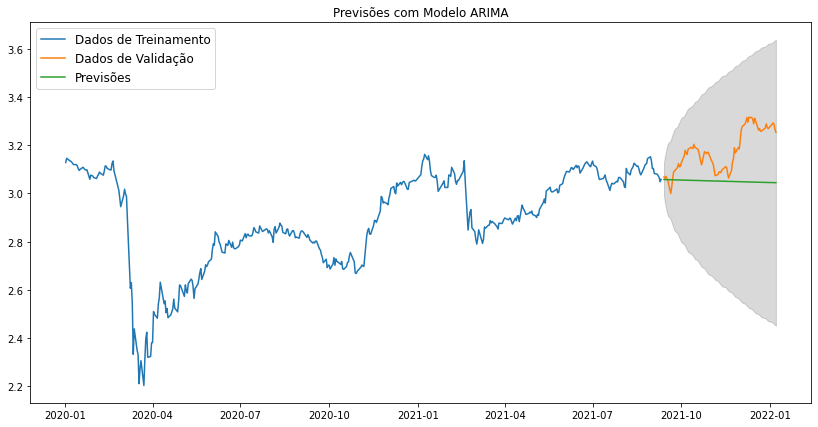

In [308]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(df_treino_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

**Apesar da previsão esta indo em direção contraria dos dados reais, a faixa do intervalo confiança a 95% está dentro dos limites de suporte e resistencia**

### Calcular o erro usando RMSE

In [309]:
# Define valor real e valor previsto
y_true = df_valid_log
y_pred = fc_series

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

0.15258876630313023


**Valor do RMSE baixo pois foi aplicado LOG nos dados originais**

# ERRO

In [312]:
# Previsões com o modelo
arima_predict = modelo_v1.predict(start = pd.to_datetime('2022-01-12'), 
                                       end = pd.to_datetime('2022-01-15'),
                                       dynamic = False)

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

In [269]:
# Função
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import scipy
import scipy.stats as scs
def tsplot(y, lags = None, figsize = (12, 8), style = 'bmh'):
    
    # Se a série não for do tipo pd.Series, fazemos a conversão
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    
    # Criamos os plots
    with plt.style.context(style):    
        fig = plt.figure(figsize = figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan = 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax = ts_ax)
        ts_ax.set_title('Plots Para Análise de Séries Temporais')
        smt.graphics.plot_acf(y, lags = lags, ax = acf_ax, alpha = 0.05)
        smt.graphics.plot_pacf(y, lags = lags, ax = pacf_ax, alpha = 0.05)
        sm.qqplot(y, line = 's', ax = qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams = (y.mean(), y.std()), plot = pp_ax)

        plt.tight_layout()
    return

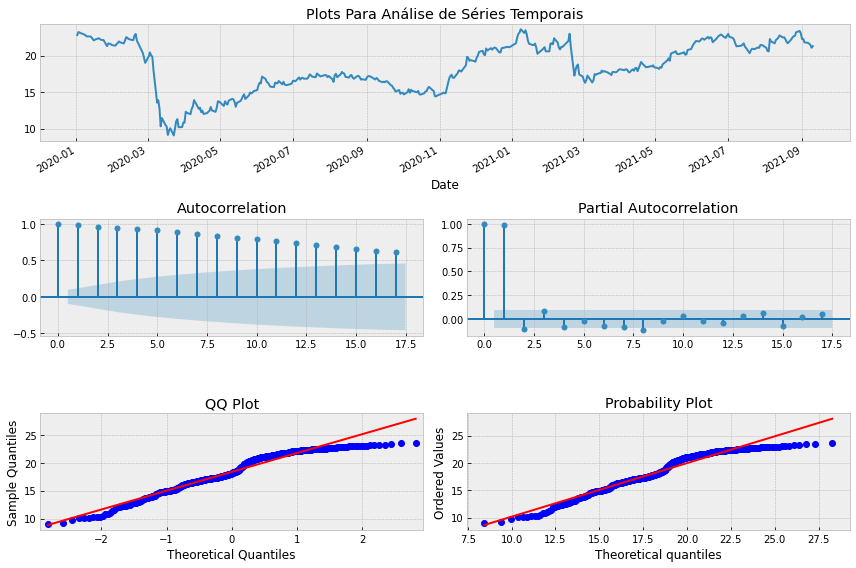

In [270]:
# Executa a função com dados de treino
tsplot(df_treino.High, lags = 17)

In [281]:
# Teste
from statsmodels.stats.stattools import jarque_bera
score, pvalue, _, _ = jarque_bera(modelo_v1.resid)
print(f'P_value: {pvalue}')
# Resultado
if pvalue < 0.05:
    print ('\nOs resíduos podem não ser normalmente distribuídos.')
else:
    print ('\nOs resíduos parecem normalmente distribuídos.')

P_value: 0.0

Os resíduos podem não ser normalmente distribuídos.


In [274]:
# Teste de Ljung-Box
resultado_teste = sms.diagnostic.acorr_ljungbox(modelo_v1.resid, lags = [30], boxpierce = False)
print('Valor-p =', resultado_teste[1])

Valor-p = [0.19434719]


Observe que o valor-p é maior que 0,05, o que indica que os resíduos são independentes no nível de 95% e, portanto, um modelo ARIMA (1,1,1) fornece um bom ajuste do modelo.

In [336]:
a = pd.to_datetime('2022-01-12',format = '%Y-%m-%d %H:%M')
a

Timestamp('2022-01-12 00:00:00')

In [337]:
a.strftime('%Y-%m-%d')

'2022-01-12'

In [339]:
df_teste.index[0]

Timestamp('2022-01-10 00:00:00')